Key Concepts of Interpretability
================================

## Model interpretability scopes

**Global** 

<ins>Holistic interpretation<ins>
- Explains how a model makes predictions based on the type of model and the data.
- E.g. Linear regression.
- Not very common, or expected.
    
<ins>Modular interpretation<ins>
- Explains the role of the *parts* of the model.
- E.g. Feature importance.
- Feature importance method tells us which *parts* (i.e. features) impact the outcome the most.

**Local** \
When looking at specific predictions.

## Our goals

We are analysts working for the national health ministry. There is a Cardiovascular Diseases (CVD) epidemic and we are tasked with the following:
- Find out what are the most important risk factors causing CVD.
- If future cases can be predicted, they must be able to be interpreted on a case-by-case basis.

## Dataset

### Loading the data and preprocessing

In [31]:
import machine_learning_datasets as mldatasets
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
cvd_df = mldatasets.load("cardiovascular-disease")

https://raw.githubusercontent.com/caravanuden/cardio/master/cardio_train.csv downloaded to c:\Users\maxen\Documents\Uni\Key Concepts of Interpretability\data\cardio_train.csv
1 dataset files found in c:\Users\maxen\Documents\Uni\Key Concepts of Interpretability\data folder
parsing c:\Users\maxen\Documents\Uni\Key Concepts of Interpretability\data\cardio_train.csv


In [3]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [4]:
cvd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [5]:
cvd_df['age'] = cvd_df['age'] / 365.24

In [6]:
cvd_df['age'].describe()

count    70000.000000
mean        53.304309
std          6.755152
min         29.564122
25%         48.362720
50%         53.945351
75%         58.391742
max         64.924433
Name: age, dtype: float64

Makes age feature more interpretable, without degrading the data since the information about the number of days is stored in the decimals.

In [7]:
cvd_df = cvd_df[(cvd_df['ap_lo'] <= 370) & (cvd_df['ap_lo'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[(cvd_df['ap_hi'] <= 370) & (cvd_df['ap_hi'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)

In [8]:
y = cvd_df['cardio']  # whether patient was diagnosed with CVD
X = cvd_df.drop(['cardio'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

In [9]:
log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()
print(log_result.summary2())

Optimization terminated successfully.
         Current function value: 0.561557
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: cardio           Pseudo R-squared: 0.190     
Date:               2023-11-19 23:44 AIC:              65618.3485
No. Observations:   58404            BIC:              65726.0502
Df Model:           11               Log-Likelihood:   -32797.   
Df Residuals:       58392            LL-Null:          -40481.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.1730   0.2504 -44.6182 0.0000 -11.6638 -10.6822
age             0.0510   0.0015  34.7971 0.0000   0.0482   0.0539


## Interpreting the results

### Using coefficients

In [10]:
log_result.params

const         -11.172964
age             0.051033
gender         -0.022737
height         -0.003618
weight          0.011067
ap_hi           0.056074
ap_lo           0.010518
cholesterol     0.493093
gluc           -0.115508
smoke          -0.130591
alco           -0.205025
active         -0.215088
dtype: float64

The summary above helps us to understand which X features contributed the most to the CVD diagnosis using the model coefficients. However, since the model uses a logistic function, it makes interpreting this results more difficult. Just by looking at the coefficients we can only tell that *cholesterol* and *active* have the highest absolute values, but not what this means.

### Using odds

The coefficients are the *log odds* of the features, but we want the *odds*. They can be obtained by applying the inverse function $e^x$ to the coefficients.

In [11]:
print('Odds\n')
print(np.exp(log_result.params).sort_values(ascending=False))

Odds

cholesterol    1.637374
ap_hi          1.057676
age            1.052357
weight         1.011129
ap_lo          1.010573
height         0.996389
gender         0.977519
gluc           0.890913
smoke          0.877576
alco           0.814627
active         0.806471
const          0.000014
dtype: float64


**Interpretation** \
The chances of CVD increase by a factor of 1.64 for each additional unit of cholesterol, provided everything else remains the same. This is more interpretable.

We are able to explain the impact of a feature on the model like this, because logistic regression models are *intrinsically interpretable*.

Odds alone don't give us too much information since they all have different scales.

In [12]:
np.std(X_train, 0)

age             6.757537
gender          0.476697
height          8.186987
weight         14.335173
ap_hi          16.703572
ap_lo           9.547583
cholesterol     0.678878
gluc            0.571231
smoke           0.283629
alco            0.225483
active          0.397215
dtype: float64

Odds also aren't a good measure for feature importance, because despite favorable odds, sometimes features are not statistically significant.\
A **p-value** of less than 0.05 indicates strong evidence that it is significant. When the value is above that number, there's no statistical evidence that it affects the predicted score.

In [13]:
p_values = log_result.pvalues
for f, v in zip(p_values.index, p_values):
    print(f"{f.ljust(15)} {v:.3f}")

const           0.000
age             0.000
gender          0.339
height          0.009
weight          0.000
ap_hi           0.000
ap_lo           0.000
cholesterol     0.000
gluc            0.000
smoke           0.001
alco            0.000
active          0.000


### Adding the standard deviation to the odds

One way of approximating what features matter most is to multiply the coefficients by the standard deviations of the features. This accounts for differences in variances between features.

In [14]:
coefs = log_result.params.drop(labels=['const', 'gender'])
stdv = np.std(X_train, 0).drop(labels='gender')
abs(coefs * stdv).sort_values(ascending=False)

ap_hi          0.936632
age            0.344855
cholesterol    0.334750
weight         0.158651
ap_lo          0.100419
active         0.085436
gluc           0.065982
alco           0.046230
smoke          0.037040
height         0.029620
dtype: float64

This is an approximation of the order of risk factors according to the model and we've achieved our first goal.

## Interpreting on a case-by-case basis

In [15]:
y_pred = log_result.predict(sm.add_constant(X_test)).to_numpy()
print(y_pred)

[0.40629892 0.17003609 0.13405939 ... 0.95575283 0.94095239 0.91455717]


In [30]:
print("Probability of developing CVD:", f"{y_pred[2872]:.4}")

Probability of developing CVD: 0.5747


In [17]:
print(X_test.iloc[2872])

age             60.521849
gender           1.000000
height         158.000000
weight          62.000000
ap_hi          130.000000
ap_lo           80.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
Name: 46965, dtype: float64


- Borderline high ap_hi (130 is the border)
- Normal ap_lo
- Age is not too old, but among the oldest in the dataset
- cholesterol is normal
- weight is in healthy range

No other risk factors:
- Normal glucose
- No smoking or alcohol
- Active lifestyle

It's not easy to understand why the prediction was positive without putting all predictions in context. Is having high blood pressure enough to be diagnosed with CVD?

### Decision plots

In [18]:
filler_feature_values = {0: 1, 1: 30, 2: 1, 3: 165, 4: 57, 5: 110, 6: 70, 7: 1, 8: 1, 9: 0, 10:0, 11:1}
filler_feature_ranges = {0: 1, 1: 35, 2: 2, 3: 110, 4: 150, 5: 140, 6: 70, 7: 3, 8: 3, 9: 2, 10:2, 11:2}

In [19]:
X_highlight = np.reshape(np.concatenate(([1], X_test.iloc[2872].to_numpy())), (1,12))
print(X_highlight)

[[  1.          60.52184865   1.         158.          62.
  130.          80.           1.           1.           0.
    0.           1.        ]]


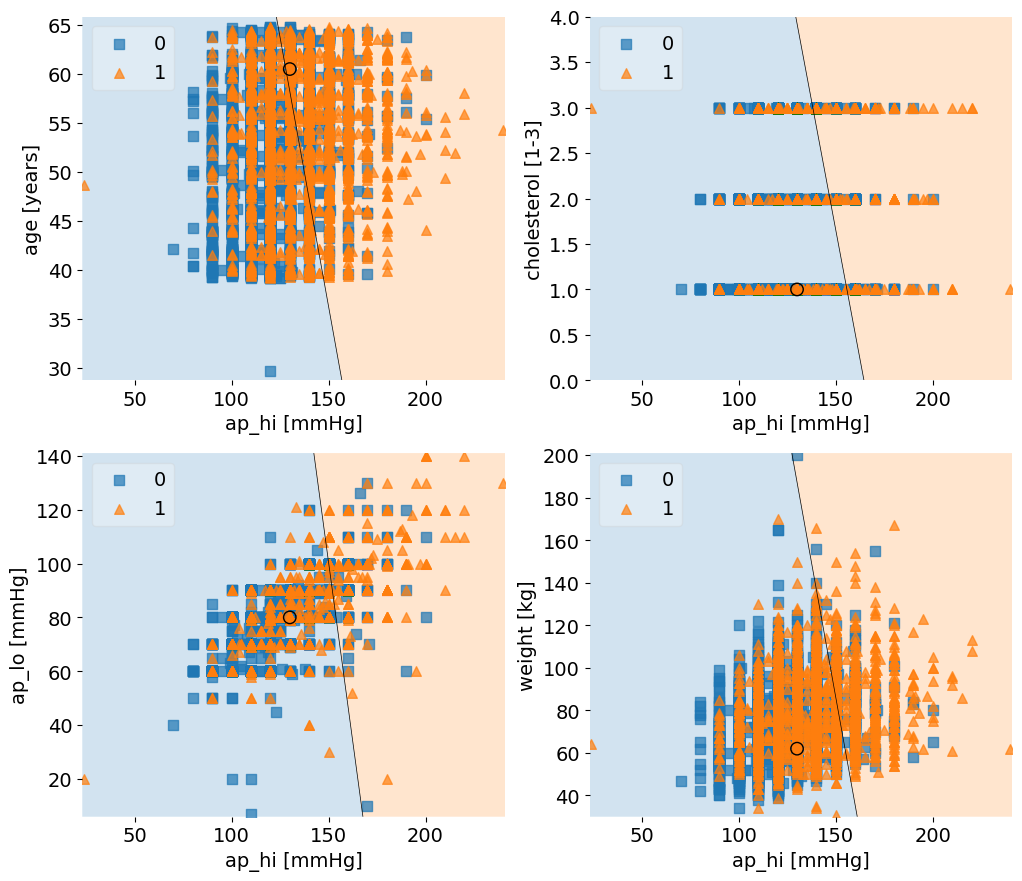

In [20]:
plt.rcParams.update({'font.size': 14})
fig, axarr = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=False)
mldatasets.create_decision_plot(X_test, y_test, log_result, [5,1],['ap_hi [mmHg]', 'age [years]'], X_highlight,filler_feature_values, filler_feature_ranges,ax=axarr.flat[0])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5,7], ['ap_hi [mmHg]', 'cholesterol [1-3]'], X_highlight, filler_feature_values, filler_feature_ranges,ax=axarr.flat[1])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5,6], ['ap_hi [mmHg]', 'ap_lo [mmHg]'], X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[2])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5,4], ['ap_hi [mmHg]', 'weight [kg]'], X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[3])
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.2)
plt.show()

We can see in all graphs but one, that the combination of values aren't enough to predict positive for CVD. The borderline high ap_hi and the relatively old age is barely enough for a positive prediction. Despite this, the model has predicted a 57% score for CVD, so this can very well be the explanation for it. 

This method can be extended to explain several cases at a time, or plot important combinations where the circle is clearly in the positive decision region.

Decision graphs give us a tool to explain specific predictions of our model on a case-by-case basis and with this we are done with our second goal.

## What hinders machine learning interpretability?

Even with some overlap between the squares and triangles, there is a pattern of more triangles in the positive side as the y-value increases. The chart with ap_hi and weight doesn't have this pattern as weight increases.

Maybe there is another variable that influences the relation between these two variables.

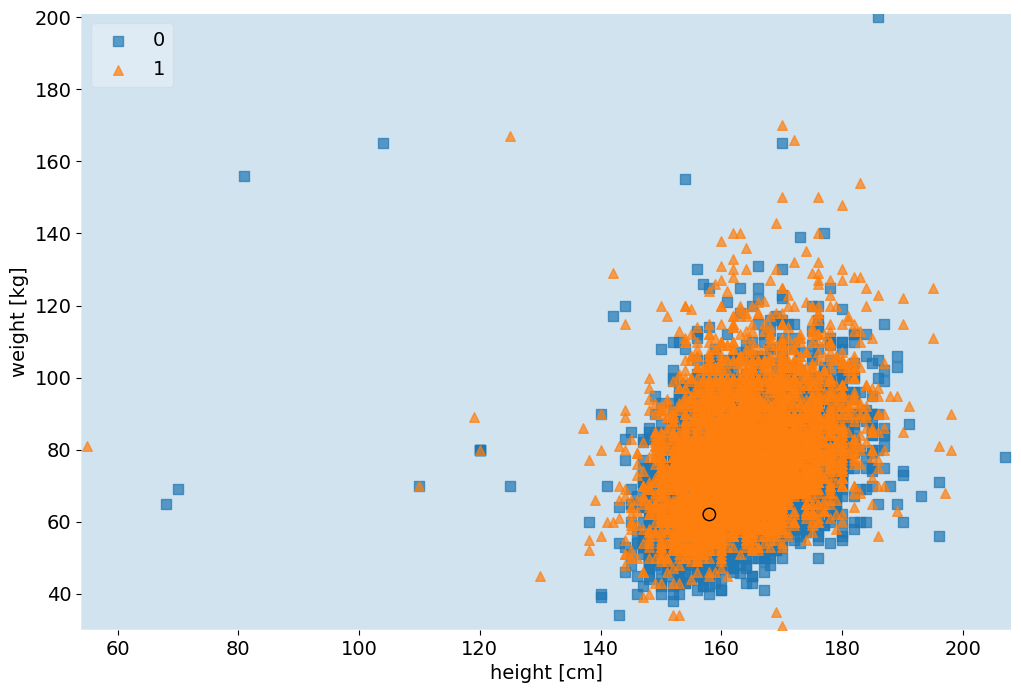

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
mldatasets.create_decision_plot(X_test, y_test, log_result, [3,4], ['height [cm]', 'weight [kg]'], X_highlight,filler_feature_values, filler_feature_ranges, ax=ax)
plt.show()

Knowing someone's weight is not as meaningful without knowing their height as this puts their weight in context. 

From the plot we can see that, based only on someone's weight and height, the model can't predict CVD.

The relationship between someone's height and weight is called the BMI:
$$BMI = \frac{weight_{kg}}{height^2_m}$$

## Non-linearity

Linear equations are intuitive, they allow us to isolate each of their terms from the outcome and analyze their effects. However, some types of models are non-linear because their training process introduces non-linearity (e.g. non-linear activation functions); this makes them harder to interpret.

Even if a model is linear, the relationship between variables might not be. This leads to reduced interpretability. In these cases we can engineer features that help "linearize" the relationships. We will try to introduce the **bmi** feature and see the results.

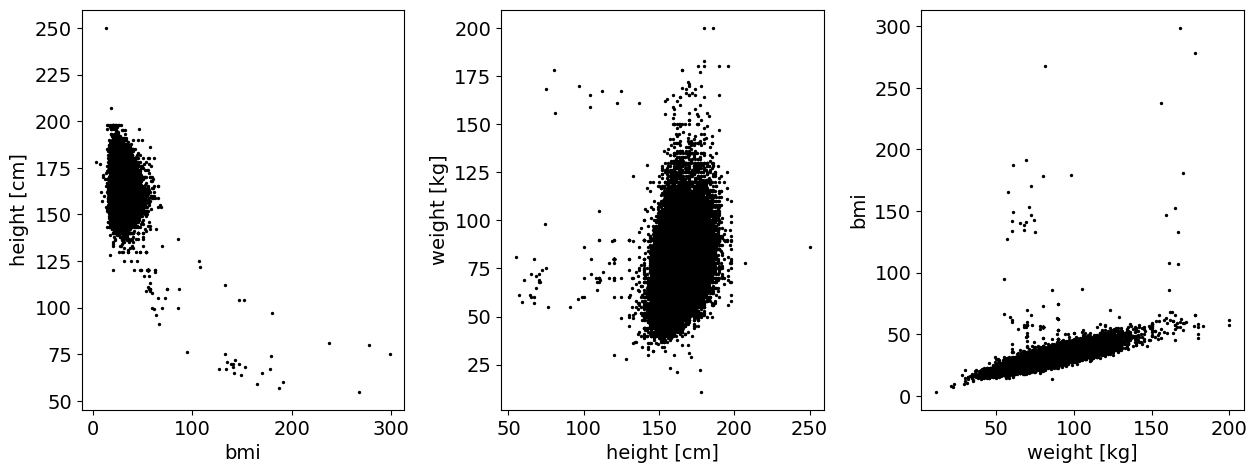

In [32]:
X2 = cvd_df.drop(['cardio'], axis=1).copy()
X2["bmi"] = X2["weight"] / (X2["height"]/100)**2
X2_train, X2_test,__,_ = train_test_split(X2, y, test_size=0.15, random_state=9)
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].scatter(X2["bmi"], X2["height"], color='black',s=2) 
axs[0].set_xlabel('bmi')
axs[0].set_ylabel('height [cm]')
axs[1].scatter(X2["height"], X2["weight"], color='black',s=2)
axs[1].set_xlabel('height [cm]')
axs[1].set_ylabel('weight [kg]')
axs[2].scatter(X2["weight"], X2["bmi"], color='black',s=2) 
axs[2].set_xlabel('weight [kg]')
axs[2].set_ylabel('bmi')
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.3) 
plt.show()

In [23]:
log_model2 = sm.Logit(y_train, sm.add_constant(X2_train))
log_result2 = log_model2.fit()

Optimization terminated successfully.
         Current function value: 0.561549
         Iterations 6


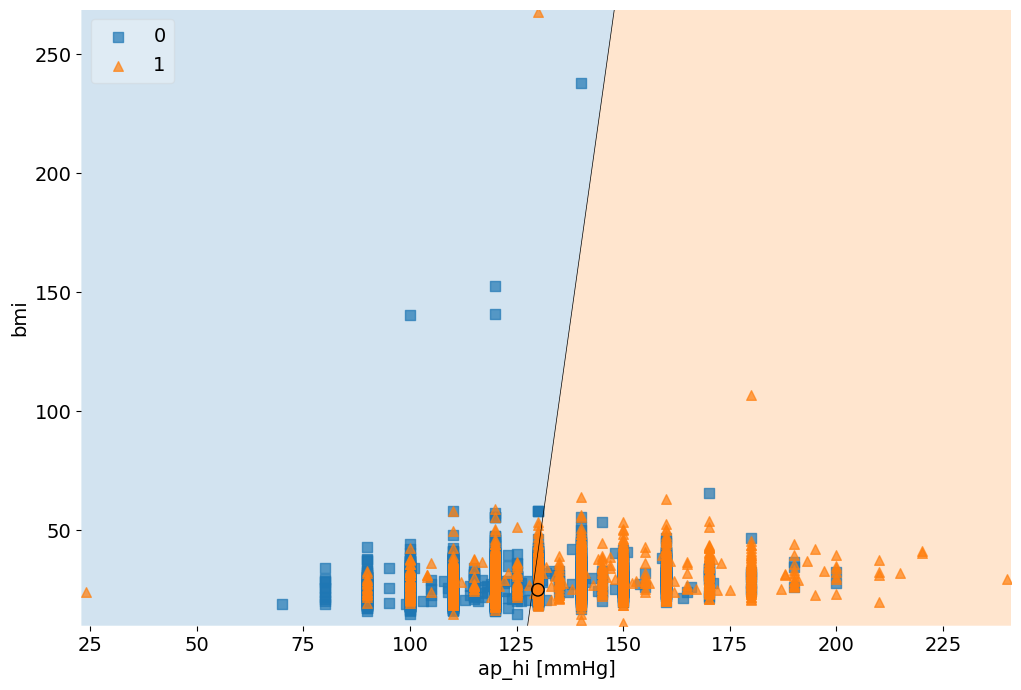

In [24]:
filler_feature_values2 = {0: 1, 1: 60, 2: 1, 3: 165, 4: 57, 5: 110, 6: 70, 7: 1, 8: 1, 9: 0, 10:0, 11:1, 12:20}
filler_feature_ranges2 = {0: 1, 1: 35, 2: 2, 3: 120, 4: 150, 5: 140, 6: 70, 7: 3, 8: 3, 9: 2, 10:2, 11:2, 12:250}
X2_highlight = np.reshape(np.concatenate(([1],X2_test.iloc[2872].to_numpy())), (1,13))
fig, ax = plt.subplots(1,1, figsize=(12,8))
mldatasets.create_decision_plot(X2_test, y_test, log_result2, [5, 12], ['ap_hi [mmHg]', 'bmi'],X2_highlight, filler_feature_values2, filler_feature_ranges2, ax=ax)
plt.show()

The relationship between the bmi and ap_hi can help explain the positive CVD prediction.

## Interactivity

BMI is called an interaction feature, because it comes from the interaction of two variables. Many models automatically permutate numerous operations between features. This is because features have latent relationships between themselves that we are trying to find. 

Looking for interactions is not always bad. For unstructured data this is even necessary, but for structured data it can hurt interpretability by adding complexity to the model. They can even find latent relationships that don't mean anything to our model (spurious correlation).